In [ ]:
file_path = "/content/dane1.csv"

In [ ]:
import pandas as pd
MAIN_DATA = pd.read_csv(file_path)

In [ ]:
info = MAIN_DATA.info()

In [ ]:
df = MAIN_DATA.copy()

In [ ]:
!python -m spacy download pl_core_news_sm

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load("pl_core_news_sm")
data1 = "/content/dane1.csv"
nlp.max_length = 4000000

with open (data1, "r", encoding = "utf-8") as file:
  text_data1= file.read()
  doc_data1 = nlp(text_data1)

In [ ]:
# Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column


In [ ]:
df["created_at"] = df['created_at'] = (
    df['created_at']
    .str.replace('Mon', 'Monday')
    .str.replace('Tue', 'Tuesday')
    .str.replace('Wed', 'Wednesday')
    .str.replace('Thu', 'Thursday')
    .str.replace('Fri', 'Friday')
    .str.replace('Sat', 'Saturday')
    .str.replace('Sun', 'Sunday')
)

In [ ]:
print(df['created_at'])

In [ ]:
# Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column

In [ ]:
df["user_created_at"].head()

In [ ]:
months = [("Jan", "01"), ("Feb", "02"), ("Mar", "03"), ("Apr", "04"),
          ("May", "05"), ("Jun", "06"), ("Jul", "07"), ("Aug", "08"),
          ("Sep", "09"), ("Oct", "10"), ("Nov", "11"), ("Dec", "12")]

for old, new in months:
    df["user_created_at"] = df["user_created_at"].str.replace(old, new)


In [ ]:
df["user_created_at"].head()

In [ ]:
# Get all links to tweets and pass them to the list

In [ ]:
tweet_links = [df["tweet_url"].dropna().tolist()]

In [ ]:
tweet_links

In [ ]:
# Get all links found in tweets and pass them to the list (urls column)
inside_tweet_links = df["urls"].dropna().tolist()

In [ ]:
inside_tweet_links

In [ ]:
# Get all image links and pass them to the list (media column)

In [ ]:
df["media"].head (30)

In [ ]:
image_links = df['media'].dropna().tolist()

In [ ]:
image_links

In [ ]:
# Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.

In [ ]:
df["text"].head(40)

In [ ]:
for text in df["text"]:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.is_stop)

In [ ]:
df['text_without_stopwords'] = ""
df['text_without_stopwords'] = ""
def no_stopwords(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop]

df["text_without_stopwords"] = df["text"].apply(no_stopwords)
print(df["text_without_stopwords"].head(3))

In [ ]:
# List the top 5 tweets with the highest number of likes

In [ ]:
top_likes = df.sort_values(by="favorite_count", ascending=False).head(5)

for tweet in top_likes["text"]:
    print(tweet)

In [ ]:
top_likes['favorite_count']

In [ ]:
# List the top 5 tweets with the highest number of retweets

In [ ]:
# retweet_count descending, then print 5 tweets

In [ ]:
top_retweet = df.sort_values(by="retweet_count", ascending=False).head(5)

for tweet in top_retweet["text"]:
    print(tweet)

In [ ]:
top_retweet['retweet_count']

In [ ]:
# Show only tweets that are not considered 'sensitive' (possibly_sensitive column).

In [ ]:
df["possibly_sensitive"].value_counts()

In [ ]:
not_sensitive = df[df["possibly_sensitive"] == False]

for elem in not_sensitive["text"]:
    print(elem)


In [ ]:
# Show the tweets of the user who created the account earliest
# (of all users in the dataset) (user_created_at column).

In [ ]:
earliest_user = df.sort_values(by="user_created_at", ascending=True).head(1)
earliest_user_id = earliest_user["user_name"].iloc[0]
tweets_earliest_user = df[df["user_name"] == earliest_user_id]

for tweet in tweets_earliest_user["text"]:
    print(tweet)

In [ ]:
# Show the tweets of the user with the most followers.

In [ ]:
favourite_user = df.sort_values(by="user_followers_count", ascending=True).head(1)
favourite_user_id = favourite_user["user_name"].iloc[0]
tweets_favourite_user = df[df["user_name"] == favourite_user_id]

for tweet in tweets_favourite_user["text"]:
    print(tweet)

In [ ]:
# Show only verified users (user_verified column).

In [ ]:
for user in df[df["user_verified"] == True]["user_name"]:
    print(user)

In [ ]:
# Indicate on which day of the week the tweets in the dataset
# were most frequently published.

In [ ]:

def weekday_count(elem):
  if elem.startswith("Monday"):
    return "Monday"
  elif elem.startswith("Tuesday"):
    return "Tuesday"
  elif elem.startswith("Wednesday"):
    return "Wednesday"
  elif elem.startswith("Thursday"):
    return "Thursday"
  elif elem.startswith("Friday"):
    return "Friday"
  elif elem.startswith("Saturday"):
    return "Saturday"
  elif elem.startswith("Sunday"):
    return "sSunday"

In [ ]:
df["publishing_days"] = df["created_at"].apply(weekday_count)
df["publishing_days"]

In [ ]:
df["publishing_days"] = df["created_at"].apply(weekday_count)
day_counts = df["publishing_days"].value_counts()
most_frequent = day_counts.idxmax()
print (most_frequent)

In [ ]:
# Extract people (persName) and add them to a column called persons
df['persons'] = ""
def extract_persons(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "persName"]

df["persons"] = df["text"].apply(extract_persons)
print(df["persons"])

In [ ]:
# Extract organisations (orgName) and place them in the column called organisations
df['organisations'] = ""
def extract_org(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "orgName"]

df["organisations"] = df["text"].apply(extract_org)
print(df["organisations"])

In [ ]:
### matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#  create a graph showing the number of tweets per day of the week

# "publishing days" per nr of tweets

Text(0.5, 1.0, 'Number of Tweets per Day of the Week')

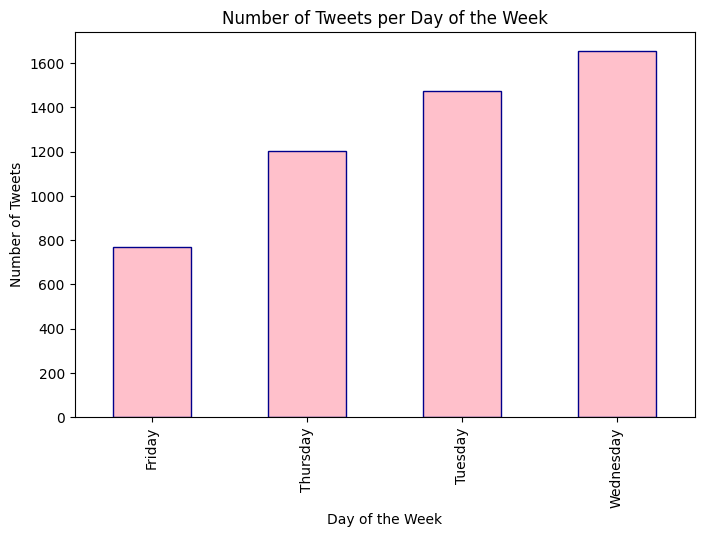

In [ ]:
tweets_per_day = df["publishing_days"].value_counts()
plt.figure(figsize=(8, 5))
tweets_per_day.sort_index().plot(kind="bar", color="pink", edgecolor="darkblue")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets per Day of the Week")

In [ ]:
df.to_csv("Olga_Gasowska_dane1.csv", index=False)